In [10]:
pip install openpyxl

     |████████████████████████████████| 250 kB 442 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## Exploratory Data Analysis on E-commerce Sales data

In [2]:
dataset = pd.read_excel("2Superstore_USA.xlsx")


In [3]:
dataset.head(5)


,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [4]:
dataset.shape

(9426, 24)

In [5]:
dataset.isnull().sum() # To check the missing values
# For eg. 72 missing values in Product Base Margin. We have to fill the missing data values using mean/std dev/ etc.

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [6]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(), inplace = True)
# To fill the missing data values with the mean | inplace = True -- to replace the original data

In [9]:
dataset['Order Priority'].value_counts() 

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [11]:
# Why "Critical" is showing two times?
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [13]:
# Data cleaning needs to be done
dataset['Order Priority'] = dataset['Order Priority'].replace('Critical ', 'Critical')

### Order Priority

In [23]:
dataset['Order Priority'].value_counts() 

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

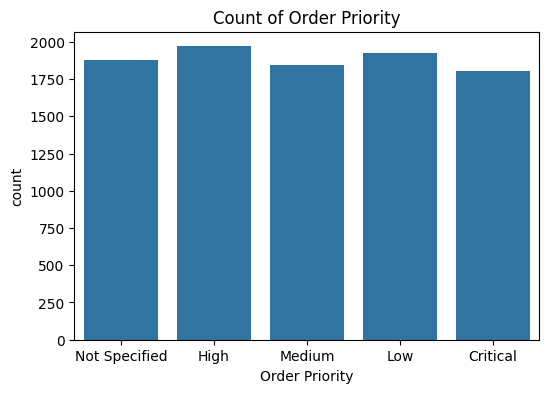

In [24]:
#To get a visual graphical representation
plt.figure(figsize=(6,4)) # To change graph size
sns.countplot(x = 'Order Priority', data = dataset)
plt.title('Count of Order Priority')
plt.show()

### Shipping Mode

In [26]:
dataset['Ship Mode'].value_counts() 

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [27]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

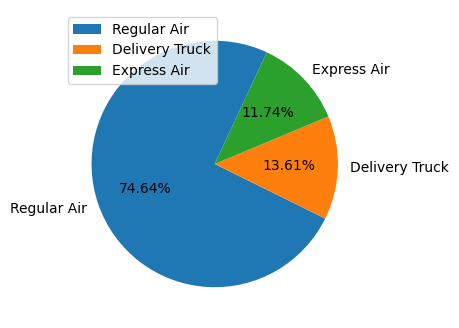

In [34]:
plt.figure(figsize=(6,4)) # To change graph size
plt.pie(y, labels = x, startangle = 65, autopct= "%0.2f%%")
plt.legend(loc = 2)
plt.show()

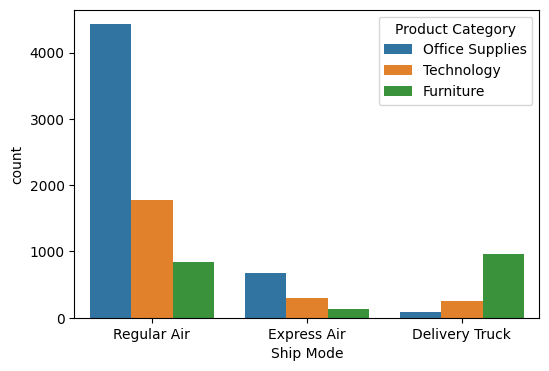

In [37]:
plt.figure(figsize=(6,4)) # To change graph size
sns.countplot( x = "Ship Mode", data = dataset, hue = 'Product Category')
plt.show()

### Customer Segment

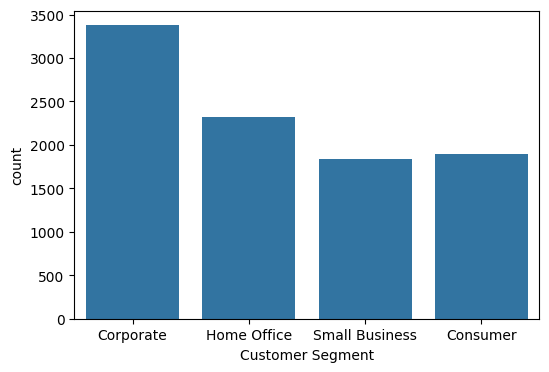

In [38]:
plt.figure(figsize=(6,4)) # To change graph size
sns.countplot( x = "Customer Segment", data = dataset)
plt.show()

### Product Category

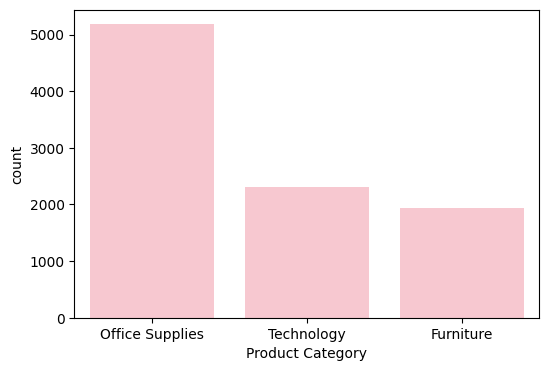

In [40]:
plt.figure(figsize=(6,4)) # To change graph size
sns.countplot( x = "Product Category", data = dataset, color= 'pink')
plt.show()

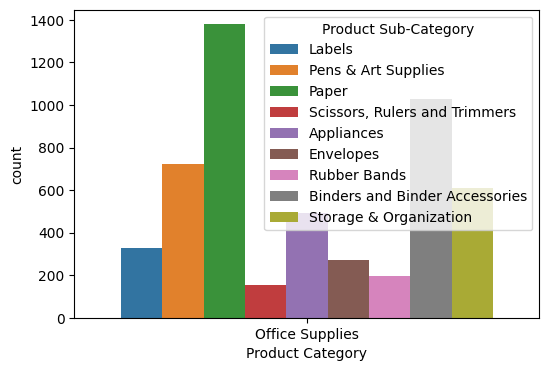

In [42]:
plt.figure(figsize=(6,4)) # To change graph size
sns.countplot( x = "Product Category", data = dataset[dataset["Product Category"] == "Office Supplies" ], hue = "Product Sub-Category")
plt.show()

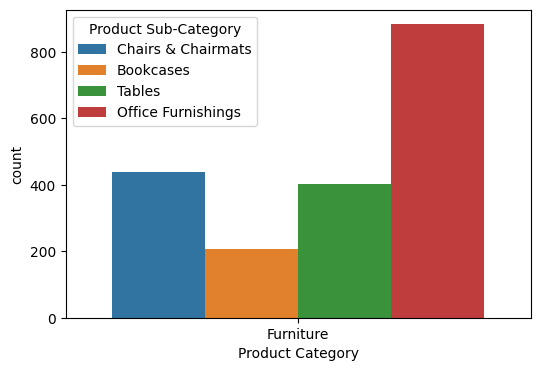

In [44]:
plt.figure(figsize=(6,4)) # To change graph size
sns.countplot( x = "Product Category", data = dataset[dataset["Product Category"] == "Furniture" ], hue = "Product Sub-Category")
plt.show()

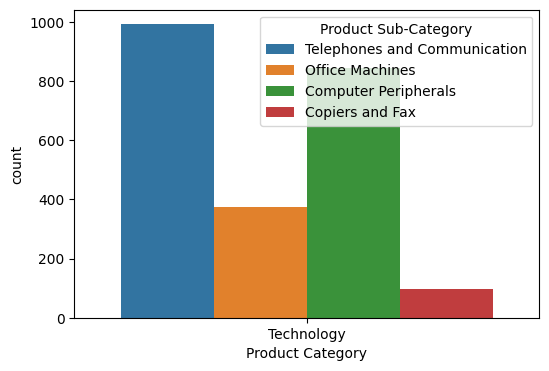

In [45]:
plt.figure(figsize=(6,4)) # To change graph size
sns.countplot( x = "Product Category", data = dataset[dataset["Product Category"] == "Technology" ], hue = "Product Sub-Category")
plt.show()

In [48]:
dataset['Order Year'] = dataset['Order Date'].dt.year

In [49]:
dataset['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

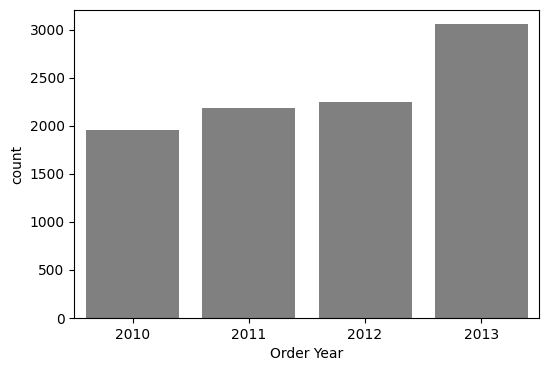

In [51]:
plt.figure(figsize=(6,4)) # To change graph size
sns.countplot( x = "Order Year", data = dataset, color= 'grey')
plt.show()

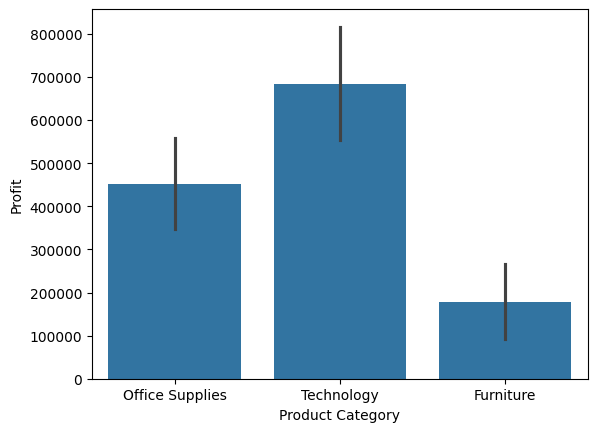

In [55]:
sns.barplot(x = 'Product Category', y = 'Profit', data = dataset, estimator='sum')
plt.show()

In [57]:
dataset['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64